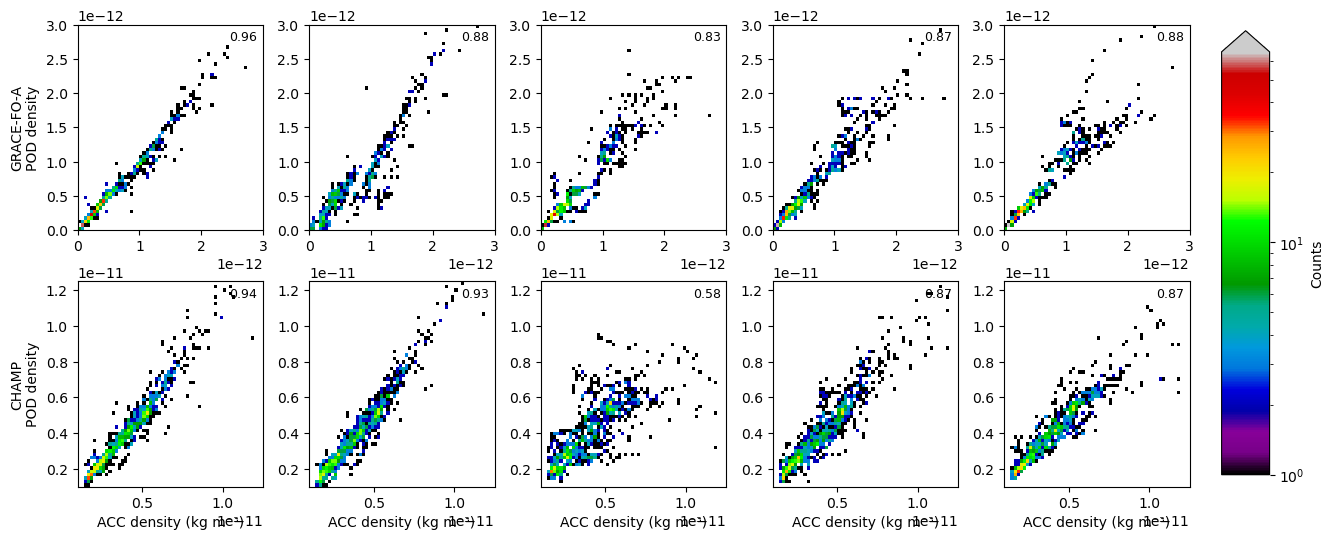

In [15]:
import pickle, numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path

def load_dataset(path):
    data = pickle.load(open(path, "rb"))
    def series(key):
        if key in data:
            return np.asarray(data[key])
        dkey = f"{key}_by_storm"
        if dkey in data:
            d = data[dkey]
            return np.concatenate([np.asarray(d[k]) for k in sorted(d)])
        raise KeyError(key)
    return {k: series(k) for k in ["ACC", "POD", "EDR", "TLE", "JB08", "MSIS"]}

root = Path("/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots")
datasets = [
    (load_dataset(root / "GRACE-FO-A/aggregated_densities.pkl"), (0, 3e-12),  "GRACE-FO-A"),
    (load_dataset(root / "CHAMP/aggregated_densities.pkl"),      (0.1e-11, 1.25e-11), "CHAMP"),
]

methods = ["POD", "EDR", "TLE", "JB08", "MSIS"]
bins = 60
vmax = 0
for d, rng, _ in datasets:
    acc = d["ACC"]
    for m in methods:
        mask = (~np.isnan(acc)) & (~np.isnan(d[m]))
        h, _, _ = np.histogram2d(acc[mask], d[m][mask], bins=bins, range=[rng, rng])
        vmax = max(vmax, h.max())
norm = LogNorm(vmin=1, vmax=vmax)

fig, axes = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(right=0.82, wspace=0.25, hspace=0.25)

for r, (d, rng, sat) in enumerate(datasets):
    acc = d["ACC"]
    for c, m in enumerate(methods):
        ax = axes[r, c]
        mask = (~np.isnan(acc)) & (~np.isnan(d[m]))
        ax.hist2d(acc[mask], d[m][mask], bins=bins, range=[rng, rng], cmap="nipy_spectral", norm=norm)
        r2 = np.corrcoef(acc[mask], d[m][mask])[0, 1]**2 if mask.sum() > 1 else np.nan
        ax.text(0.97, 0.97, f"{r2:.2f}", ha="right", va="top", transform=ax.transAxes, fontsize=9)
        ax.set_xlim(rng); ax.set_ylim(rng)
        if r == 1: ax.set_xlabel("ACC density (kg m⁻³)")
        if c == 0: ax.set_ylabel(f"{sat}\n{m} density", rotation=90)

cbar_ax = fig.add_axes([0.84, 0.13, 0.03, 0.74])
fig.colorbar(axes[0, 0].collections[0], cax=cbar_ax, label="Counts", extend="max")

plt.show()

{'20240510T000027_20240513T000012': array([1.13486145e-12, 1.16088065e-12, 1.16512958e-12, 1.16892570e-12,
       1.21396495e-12, 1.23651456e-12, 1.27025250e-12, 1.29904394e-12,
       1.30018546e-12, 1.27091441e-12, 1.28393977e-12, 1.69722921e-12,
       2.15296797e-12, 2.70111901e-12, 3.18506547e-12, 3.87632983e-12,
       4.52582997e-12, 4.52091335e-12, 4.38038604e-12, 4.05080501e-12,
       4.28945383e-12, 4.02680639e-12, 3.70966089e-12, 3.40621445e-12,
       3.33640382e-12, 2.79517125e-12, 2.42787956e-12, 2.22714619e-12,
       1.89499973e-12, 1.63248601e-12, 1.41038084e-12, 1.43834075e-12,
       1.38579475e-12, 1.34265393e-12, 1.31152758e-12, 1.24248116e-12,
       1.22590362e-12, 1.14636917e-12, 1.09307826e-12, 1.08746306e-12,
       1.10938220e-12, 1.10451459e-12, 1.11101392e-12, 1.11918463e-12,
       1.20989523e-12]), '20220311T215957_20220313T235942': array([5.49052934e-13, 6.02815172e-13, 5.83782719e-13, 5.90981846e-13,
       6.07888603e-13, 5.83406175e-13, 5.47135391e-1

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

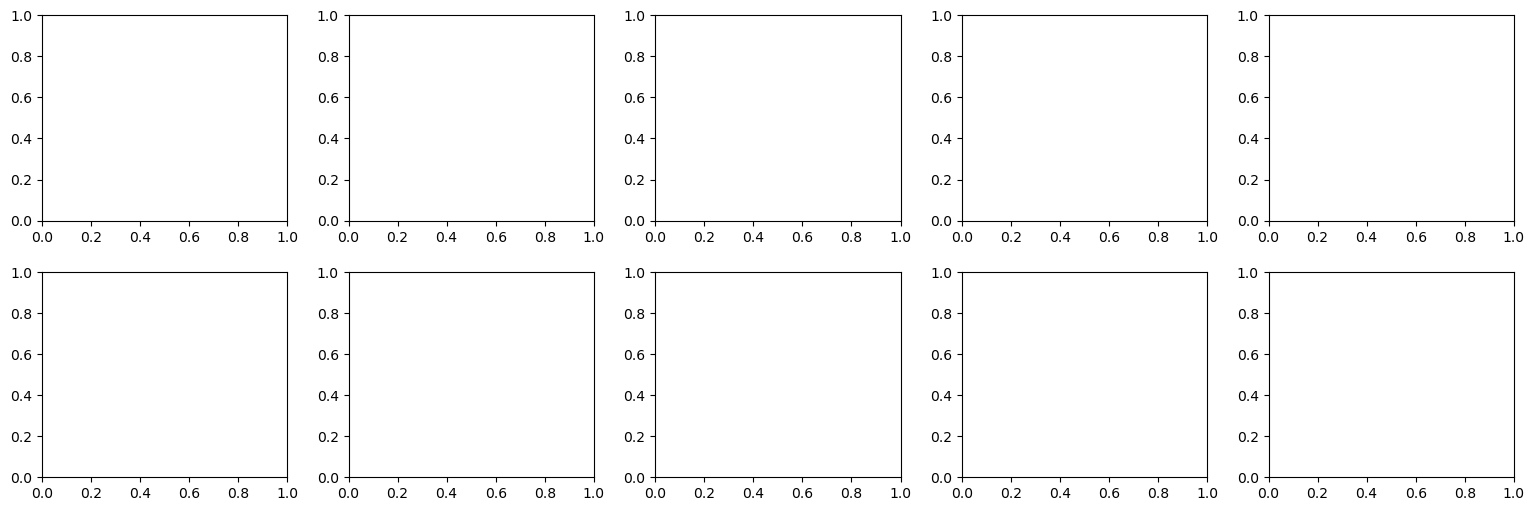

In [ ]:
import pickle, numpy as np, matplotlib.pyplot as plt
from pathlib import Path

root = Path("/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots")
data_g = pickle.load(open(root / "GRACE-FO-A/aggregated_densities.pkl", "rb"))
data_c = pickle.load(open(root / "CHAMP/aggregated_densities.pkl",      "rb"))

methods  = ["POD", "EDR", "TLE", "JB08", "MSIS"]
datasets = [(data_g, (0, 3e-12),  "GRACE-FO-A"),
            (data_c, (0.1e-11, 1.25e-11), "CHAMP")]

fig, axes = plt.subplots(2, 5, figsize=(16, 6))
fig.subplots_adjust(wspace=0.25, hspace=0.25, left=0.06, right=0.98)

for r, (d, rng, sat) in enumerate(datasets):
    acc = d["ACC"]
    for c, m in enumerate(methods):
        ax   = axes[r, c]
        mask = (~np.isnan(acc)) & (~np.isnan(d[m]))
        ax.scatter(acc[mask], d[m][mask], s=6, alpha=0.05)
        r2 = np.corrcoef(acc[mask], d[m][mask])[0,1]**2 if mask.sum()>1 else np.nan
        ax.text(0.97, 0.97, f"{r2:.2f}", ha="right", va="top",
                transform=ax.transAxes, fontsize=9)
        ax.set_xlim(rng), ax.set_ylim(rng)
        if r == 1: ax.set_xlabel("ACC density (kg m⁻³)")
        if c == 0: ax.set_ylabel(f"{sat}\n{m} density", rotation=90)

plt.show()

/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_69321/395210706.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.88, 0.95])


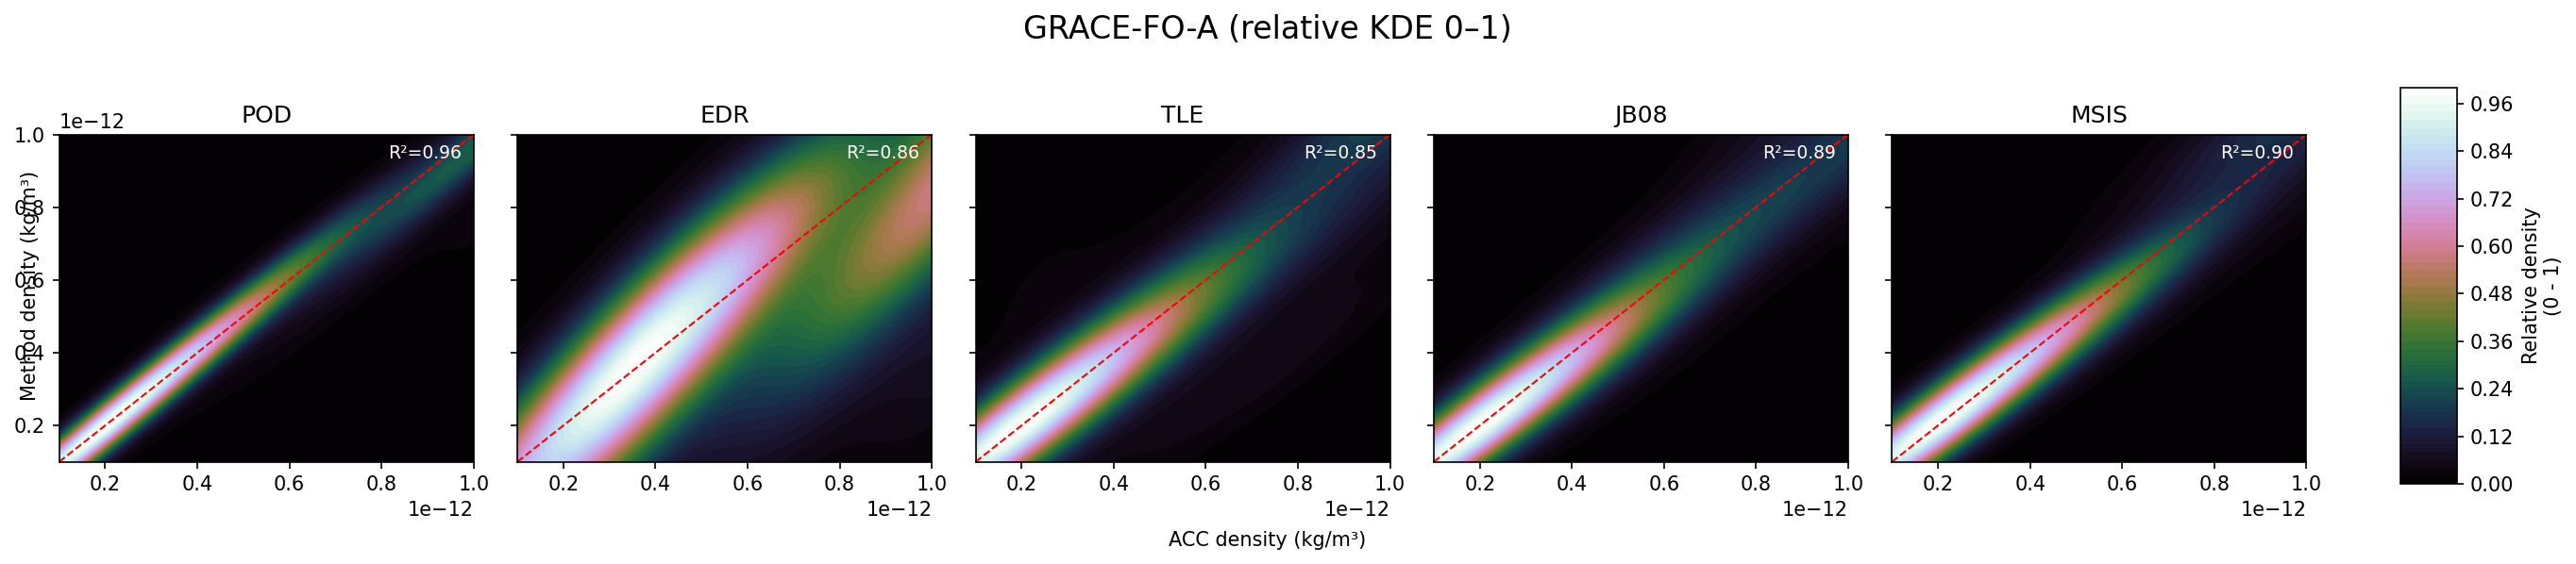

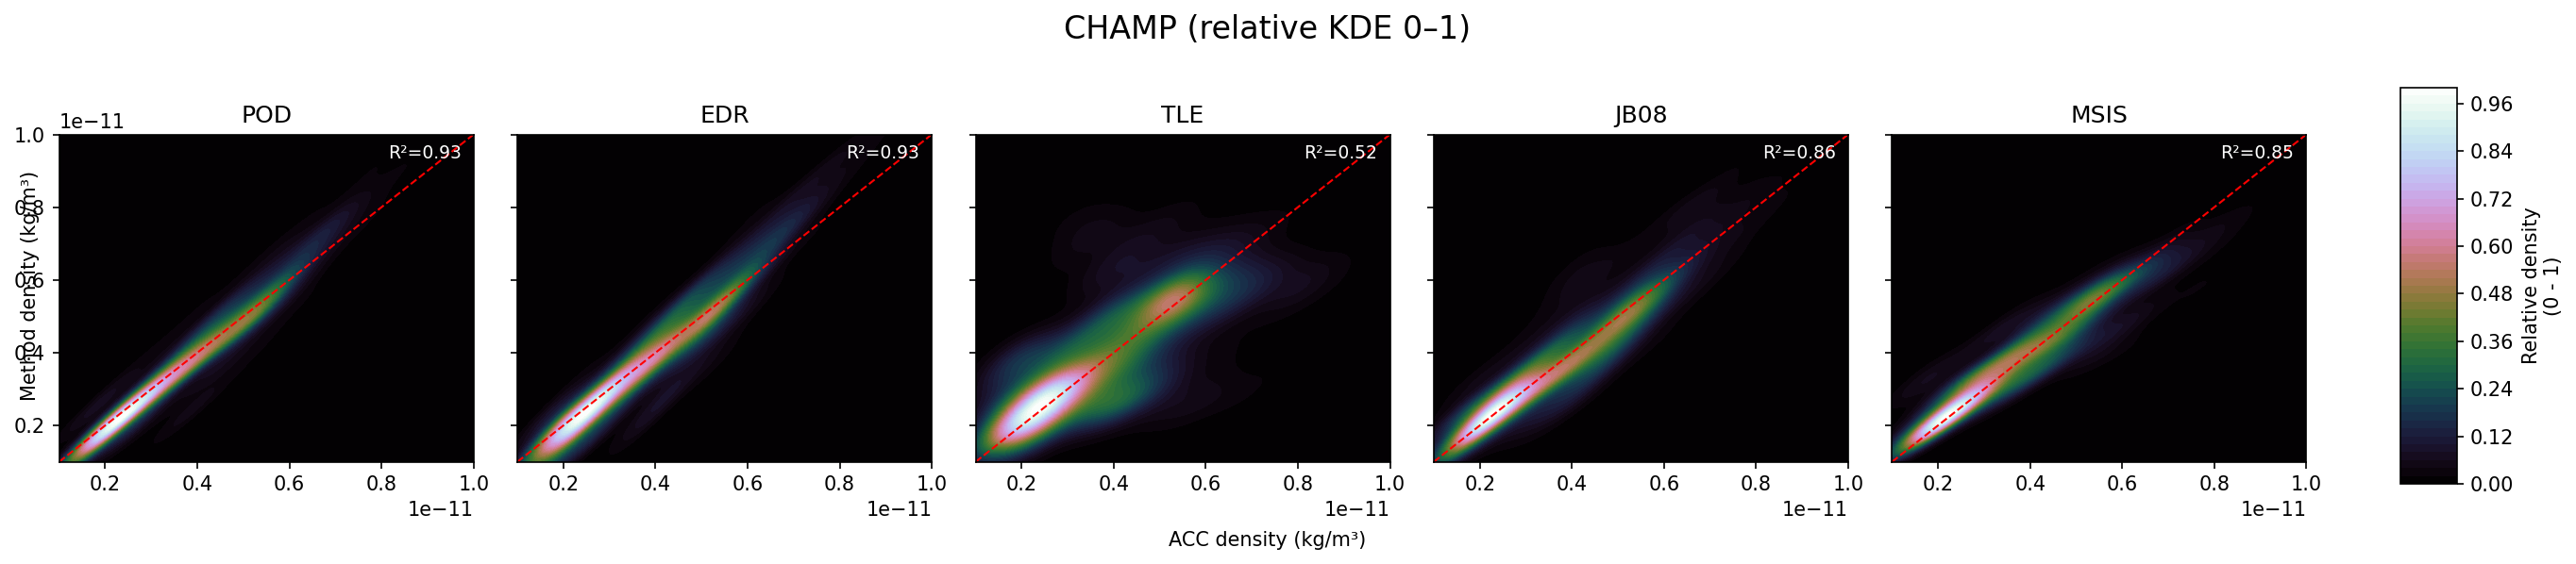

In [31]:
import pickle
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# load your aggregated data
root = Path("/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots")
data_g = pickle.load(open(root / "GRACE-FO-A/aggregated_densities.pkl", "rb"))
data_c = pickle.load(open(root / "CHAMP/aggregated_densities.pkl",      "rb"))

methods  = ["POD", "EDR", "TLE", "JB08", "MSIS"]
datasets = [
    (data_g, (0.1e-12, 1e-12),  "GRACE-FO-A"),
    (data_c, (0.1e-11, 1.0e-11), "CHAMP")
]

for d, (lo, hi), sat in datasets:
    acc = d["ACC"]
    fig, axes = plt.subplots(
        1, len(methods), figsize=(20, 4), dpi=150,
        sharex=True, sharey=True
    )
    fig.suptitle(f"{sat} (relative KDE 0–1)", fontsize=16)

    last_cf = None
    # prepare evaluation grid
    xi, yi = np.mgrid[lo:hi:200j, lo:hi:200j]
    grid_coords = np.vstack([xi.ravel(), yi.ravel()])

    for ax, method in zip(axes, methods):
        vals = d[method]
        mask = (~np.isnan(acc)) & (~np.isnan(vals))

        if mask.sum() > 1:
            x, y = acc[mask], vals[mask]
            kde = gaussian_kde(np.vstack([x, y]))
            zi = kde(grid_coords).reshape(xi.shape)
            zi /= zi.max()  # normalize to [0, 1]

            cf = ax.contourf(
                xi, yi, zi,
                levels=50, cmap="cubehelix"
            )
            last_cf = cf

            r2 = np.corrcoef(x, y)[0,1]**2
            ax.text(
                0.97, 0.97, f"R²={r2:.2f}",
                ha="right", va="top",
                transform=ax.transAxes, fontsize=9, color="white"
            )
        else:
            ax.text(
                0.5, 0.5, "not enough data",
                ha="center", va="center", color="gray"
            )

        # set limits
        ax.set_xlim(lo, hi)
        ax.set_ylim(lo, hi)

        # add 1:1 reference line
        ax.plot([lo, hi], [lo, hi], linestyle='--', color='red', linewidth=1)

        ax.set_title(method)

    if last_cf is not None:
        fig.subplots_adjust(right=0.88)
        cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
        fig.colorbar(
            last_cf, cax=cbar_ax,
            label="Relative density\n(0 - 1)"
        )

    fig.text(0.5, 0.04, "ACC density (kg/m³)", ha="center")
    fig.text(0.06, 0.5, "Method density (kg/m³)", va="center", rotation="vertical")

    plt.tight_layout(rect=[0.05, 0.05, 0.88, 0.95])
    plt.show()

/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_67164/786024596.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.88, 0.95])


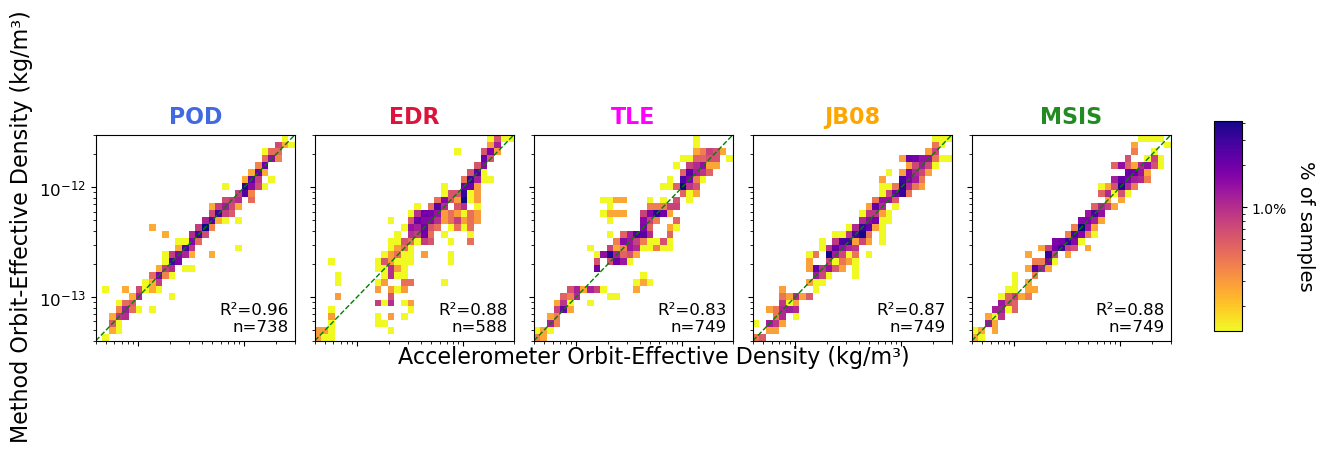

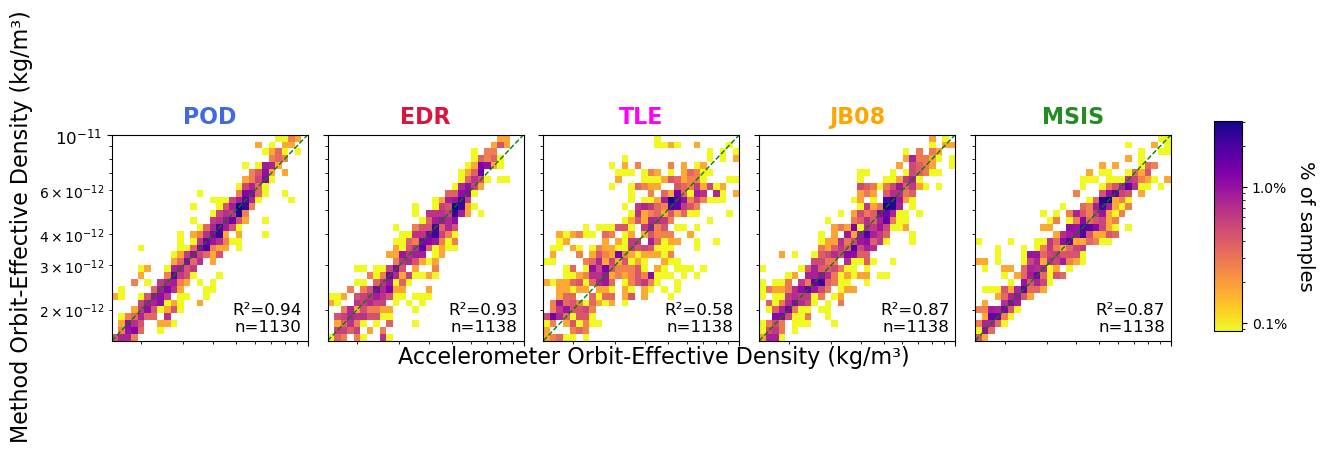

In [51]:
import pickle
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# -------------------------------------------------------------------
# 1.  Paths and methods
# -------------------------------------------------------------------
root = Path("/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots")
data_g = pickle.load(open(root / "GRACE-FO-A" / "aggregated_densities.pkl", "rb"))
data_c = pickle.load(open(root / "CHAMP" / "aggregated_densities.pkl", "rb"))

methods  = ["POD", "EDR", "TLE", "JB08", "MSIS"]
datasets = [
    (data_g, (0.4e-13, 3e-12),  "GRACE-FO-A"),
    (data_c, (1.5e-12, 1e-11),  "CHAMP")
]

COLOURS = {
    "JB08": "orange",
    "MSIS": "forestgreen",
    "POD":  "royalblue",
    "EDR":  "crimson",
    "TLE":  "magenta"
}

# -------------------------------------------------------------------
# 2.  Plotting
# -------------------------------------------------------------------
for d, (lo, hi), sat in datasets:
    fig, axes = plt.subplots(
        1, len(methods),
        figsize=(14, 3),
        sharey=True
    )

    # define log‐spaced bin edges
    nbins = 30
    xbins = np.logspace(np.log10(lo), np.log10(hi), nbins + 1)
    ybins = xbins.copy()

    last = None
    for ax, method in zip(axes, methods):
        # Build flat per‐orbit arrays
        x_list, y_list = [], []
        acc_by_storm = d.get("ACC_by_storm", {})
        method_by_storm = d.get(f"{method}_by_storm", {})

        for storm_id, acc_arr in acc_by_storm.items():
            if acc_arr is None or len(acc_arr) == 0:
                continue
            mdl_arr = method_by_storm.get(storm_id)
            if mdl_arr is None or len(mdl_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(mdl_arr)
            if not np.any(mask):
                continue

            x_list.append(acc_arr[mask])
            y_list.append(mdl_arr[mask])

        if x_list:
            x = np.concatenate(x_list)
            y = np.concatenate(y_list)
        else:
            x = np.array([])
            y = np.array([])

        n = len(x)
        if n > 1:
            weights = np.ones(n) / n * 100

            H, xe, ye = np.histogram2d(x, y, bins=[xbins, ybins], weights=weights)
            Hmask = np.ma.masked_where(H == 0, H)

            pcm = ax.pcolormesh(
                xe, ye, Hmask.T,
                cmap="plasma_r",
                norm=LogNorm(vmin=Hmask.min(), vmax=Hmask.max()),
                linewidth=0
            )
            last = pcm

            # 1:1 line
            ax.plot([lo, hi], [lo, hi], "--", color="green", linewidth=1.0)

            # R² and n
            r2 = np.corrcoef(x, y)[0, 1]**2
            ax.text(
                0.97, 0.03,
                f"R²={r2:.2f}\nn={n}",
                ha="right", va="bottom",
                transform=ax.transAxes,
                color="black",
                fontsize=12
            )
        else:
            ax.text(
                0.5, 0.5,
                "not enough data",
                ha="center", va="center",
                color="gray",
                fontsize=14
            )

        # Log scales
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlim(lo, hi)
        ax.set_ylim(lo, hi)

        # Remove x-axis labels but keep tick marks
        ax.tick_params(axis='x', which='both', labelbottom=False)

        # Increase tick label size
        ax.tick_params(axis='both', which='major', labelsize=12)
        # Title in specified colour
        ax.set_title(method, fontsize=16, pad=8, color=COLOURS[method], fontweight='bold')

    # shared colorbar
    if last is not None:
        cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
        cb = fig.colorbar(last, cax=cax, format="%.1f%%")
        cb.set_label("% of samples", rotation=270, labelpad=20, fontsize=14)

    # Axis labels
    fig.text(
        0.5, 0.04,
        "Accelerometer Orbit-Effective Density (kg/m³)",
        ha="center",
        fontsize=16
    )
    fig.text(
        0.04, 0.5,
        "Method Orbit-Effective Density (kg/m³)",
        va="center",
        rotation="vertical",
        fontsize=16
    )

    plt.tight_layout(rect=[0.05, 0.05, 0.88, 0.95])
    plt.savefig(root / f"{sat}_heatmap.png", dpi=150)
    plt.show()

/var/folders/nh/9y501_nj2x56h2t3ch9_05f40000gn/T/ipykernel_6523/375747609.py:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  np.diff(np.array(times, dtype="datetime64[s]"))


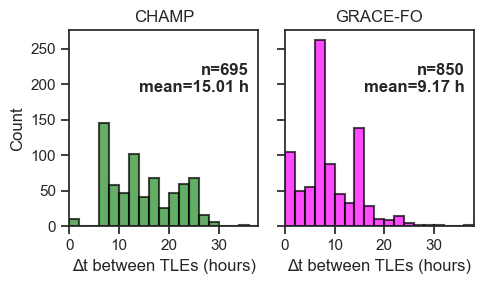

In [ ]:
from pathlib import Path
from datetime import datetime, timedelta, timezone
import numpy as np
import matplotlib.pyplot as plt

def tle_epoch_to_datetime(line1):
    e = line1[18:32]
    return datetime(
        2000 + int(e[:2]), 1, 1, tzinfo=timezone.utc
    ) + timedelta(days=float(e[2:]) - 1)

root = Path("/Users/charlesc/Documents/GitHub/POD-Density-Inversion/external/TLEs")
champ_dh, grace_dh = [], []

for f in root.glob("*.txt"):
    nid = int(f.name.split("_")[0])
    lines = f.read_text().splitlines()
    times = [tle_epoch_to_datetime(lines[i]) for i in range(0, len(lines), 2)]
    times.sort()
    deltas_h = (
        np.diff(np.array(times, dtype="datetime64[s]"))
        / np.timedelta64(1, "h")
    )
    if nid == 26405:
        champ_dh.extend(deltas_h)
    elif nid == 43476:
        grace_dh.extend(deltas_h)

# Skip if both are empty
if not champ_dh and not grace_dh:
    print("No TLE intervals found for either satellite.")
    sys.exit(0)

# Compute statistics and counts, handling empties
mean_c = np.mean(champ_dh) if champ_dh else np.nan
n_c    = len(champ_dh)
mean_g = np.mean(grace_dh) if grace_dh else np.nan
n_g    = len(grace_dh)

# Define bins: only consider non-empty for max_edge
all_values = (champ_dh + grace_dh)
BIN_WIDTH = 2
min_edge = 0
max_edge = max(all_values) if all_values else BIN_WIDTH
edges = np.arange(min_edge, max_edge + BIN_WIDTH, BIN_WIDTH)

fig, axes = plt.subplots(1, 2, figsize=(5, 3), sharex=True, sharey=True)

# Plot CHAMP if available
if champ_dh:
    axes[0].hist(
        champ_dh, bins=edges,
        color='forestgreen', alpha=0.7,
        edgecolor='black', linewidth=1.5
    )
    axes[0].set_title("CHAMP")
    axes[0].text(
        0.95, 0.75,
        f'n={n_c}\nmean={mean_c:.2f} h',
        ha='right', va='center',
        transform=axes[0].transAxes,
        fontsize=12, weight='bold'
    )
else:
    axes[0].text(0.5, 0.5, "No CHAMP data", ha='center', va='center')
    axes[0].set_title("CHAMP")

# Plot GRACE-FO if available
if grace_dh:
    axes[1].hist(
        grace_dh, bins=edges,
        color='magenta', alpha=0.7,
        edgecolor='black', linewidth=1.5
    )
    axes[1].set_title("GRACE-FO")
    axes[1].text(
        0.95, 0.75,
        f'n={n_g}\nmean={mean_g:.2f} h',
        ha='right', va='center',
        transform=axes[1].transAxes,
        fontsize=12, weight='bold'
    )
else:
    axes[1].text(0.5, 0.5, "No GRACE-FO data", ha='center', va='center')
    axes[1].set_title("GRACE-FO")

for ax in axes:
    ax.set_xlim(edges[0], edges[-1])
    ax.set_ylim(0, None)
    ax.set_xlabel('Δt between TLEs (hours)')

axes[0].set_ylabel('Count')
plt.tight_layout()

plt.savefig("output/PODDensityInversion/Plots/TLE_intervals_histogram.png", dpi=300)
plt.show()

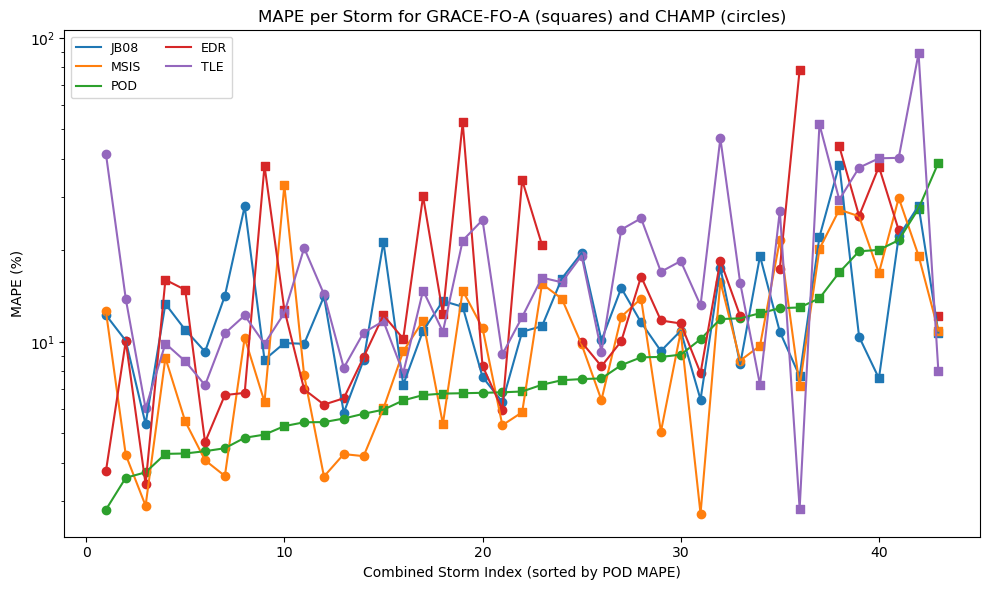

In [12]:
# Combine GRACE and CHAMP, sort by POD MAPE, and plot one line per method with different markers

# Load and combine
df_g2 = load_mape_df(SAT_FOLDERS["GRACE-FO-A"]).assign(SAT="GRACE")
df_c2 = load_mape_df(SAT_FOLDERS["CHAMP"]).assign(SAT="CHAMP")
df_all = pd.concat([df_g2, df_c2], ignore_index=True)
df_all = df_all.sort_values(by="POD").reset_index(drop=True)

x = np.arange(1, len(df_all) + 1)

plt.figure(figsize=(10, 6))
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for m, color in zip(METHODS, colors):
    y = df_all[m]
    # Draw the line for each method
    plt.plot(x, y, color=color, label=m)
    # Plot GRACE points as squares
    mask_g = df_all["SAT"] == "GRACE"
    plt.scatter(x[mask_g], y[mask_g], marker="s", color=color)
    # Plot CHAMP points as circles
    mask_c = df_all["SAT"] == "CHAMP"
    plt.scatter(x[mask_c], y[mask_c], marker="o", color=color)

plt.xlabel("Combined Storm Index (sorted by POD MAPE)")
plt.ylabel("MAPE (%)")
plt.title("MAPE per Storm for GRACE-FO-A (squares) and CHAMP (circles)")
plt.legend(ncol=2, fontsize=9)
#log scale for y-axis
plt.yscale("log")
plt.tight_layout()
plt.show()

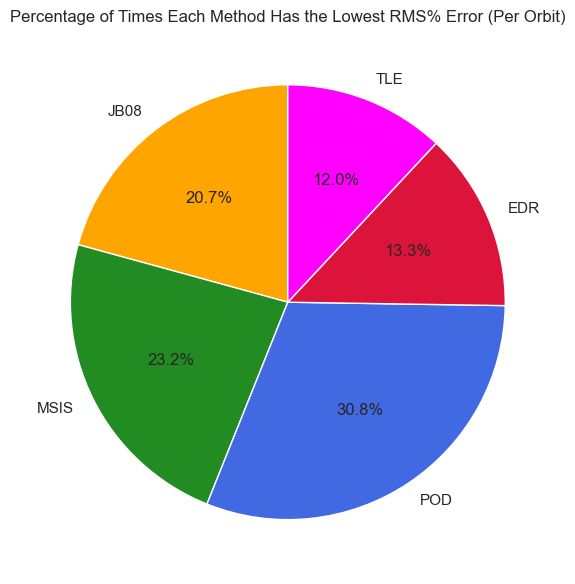

In [168]:
import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Paths and methods
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]
COLOURS = {
    "JB08": "orange",
    "MSIS": "forestgreen",
    "POD":  "royalblue",
    "EDR":  "crimson",
    "TLE":  "magenta"
}

# -------------------------------------------------------------------
# 1.  Compute per‐orbit RMS for each method and count best-per-orbit
# -------------------------------------------------------------------
best_methods = []  # will hold the name of the method with lowest RMS for each orbit

for sat_name, folder in SAT_FOLDERS.items():
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        # Gather all method arrays for this storm
        method_arrays = {}
        for m in METHODS:
            arr = data.get(f"{m}_by_storm", {}).get(storm_id)
            # must be same length as acc_arr to consider
            if arr is None or len(arr) != len(acc_arr):
                method_arrays[m] = None
            else:
                method_arrays[m] = arr

        # Stack per-orbit: only orbits where ACC is finite and every method array is finite
        n = len(acc_arr)
        for i in range(n):
            a = acc_arr[i]
            if not (np.isfinite(a) and a != 0):
                continue

            # Compute RMS% for each method at this orbit index
            rms_vals = {}
            valid_all = True
            for m in METHODS:
                arr = method_arrays[m]
                if arr is None:
                    valid_all = False
                    break
                v = arr[i]
                if not np.isfinite(v):
                    valid_all = False
                    break
                err = (v - a) / a
                rms_vals[m] = abs(err) * 100

            if not valid_all:
                continue

            # Choose method with smallest RMS% at this orbit
            best = min(METHODS, key=lambda m: rms_vals[m])
            best_methods.append(best)

# If no orbits found, exit
if len(best_methods) == 0:
    raise RuntimeError("No valid orbits with complete method data found.")

# -------------------------------------------------------------------
# 2.  Compute percentages per method
# -------------------------------------------------------------------
counts = pd.Series(best_methods).value_counts(normalize=True) * 100
percentages = [counts.get(m, 0.0) for m in METHODS]

# -------------------------------------------------------------------
# 3.  Plot pie chart
# -------------------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=METHODS,
    autopct="%1.1f%%",
    startangle=90,
    colors=[COLOURS[m] for m in METHODS]
)
plt.title("Percentage of Times Each Method Has the Lowest RMS% Error (Per Orbit)")
plt.tight_layout()
plt.show()

/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/py

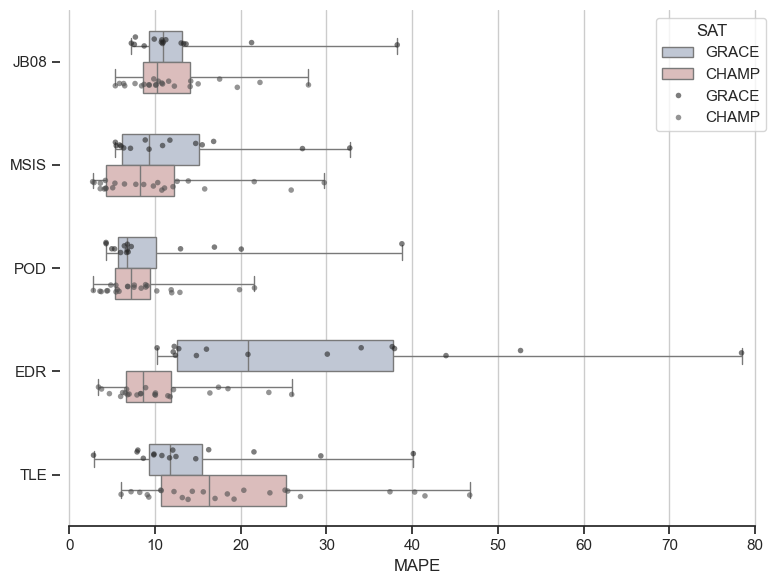

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib

# Paths and methods
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]

def load_mape_df(folder):
    records = []
    for csv_path in sorted(folder.glob("metrics_*.csv")):
        df = pd.read_csv(csv_path, index_col=0)
        if "MAPE(%)" not in df.columns:
            continue
        row = {}
        for m in METHODS:
            if m in df.index:
                val = df.loc[m, "MAPE(%)"]
                row[m] = val if np.isfinite(val) else np.nan
            else:
                row[m] = np.nan
        records.append(row)
    return pd.DataFrame(records)

df_grace = load_mape_df(SAT_FOLDERS["GRACE-FO-A"]).assign(SAT="GRACE")
df_champ = load_mape_df(SAT_FOLDERS["CHAMP"]).assign(SAT="CHAMP")
df_all = pd.concat([df_grace, df_champ], ignore_index=True)
df_clean = df_all.dropna(subset=METHODS, how="any")

long_df = df_clean.melt(id_vars=["SAT"], value_vars=METHODS, var_name="Method", value_name="MAPE")

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(
    data=long_df, x="MAPE", y="Method", hue="SAT",
    whis=[0, 100], width=.6, palette="vlag"
)
sns.stripplot(
    data=long_df, x="MAPE", y="Method",
    hue="SAT", dodge=True, size=4, color=".3", alpha=0.6
)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/py

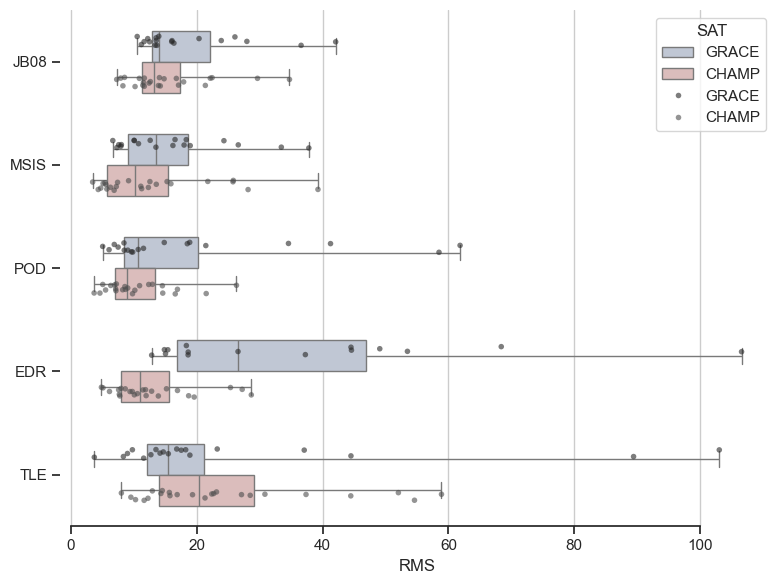

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import pickle

# Paths and methods
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]

# -------------------------------------------------------------------
# 1.  Compute per‐storm RMS(%) from the pickle data
# -------------------------------------------------------------------
def load_rms_df(folder):
    """
    Loads aggregated_densities.pkl from 'folder', which contains:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities}
      - one dict per method, e.g. 'JB08_by_storm', 'MSIS_by_storm', etc.

    Returns a DataFrame where each row is one storm, columns = METHODS,
    and each value is that method’s RMS% error for that storm.
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict  = data.get("ACC_by_storm", {})
    rms_records = []

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        row = {}
        # For each method, compute RMS%
        for m in METHODS:
            method_key = f"{m}_by_storm"
            method_arr = data.get(method_key, {}).get(storm_id, None)
            if method_arr is None or len(method_arr) != len(acc_arr):
                row[m] = np.nan
            else:
                mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(method_arr)
                if np.count_nonzero(mask) < 2:
                    row[m] = np.nan
                else:
                    err = (method_arr[mask] - acc_arr[mask]) / acc_arr[mask]
                    row[m] = np.sqrt(np.mean(err**2)) * 100
        rms_records.append(row)

    return pd.DataFrame(rms_records)

# -------------------------------------------------------------------
# 2.  Load GRACE and CHAMP RMS data into one DataFrame with 'SAT' column
# -------------------------------------------------------------------
df_grace = load_rms_df(SAT_FOLDERS["GRACE-FO-A"]).assign(SAT="GRACE")
df_champ = load_rms_df(SAT_FOLDERS["CHAMP"]).assign(SAT="CHAMP")

df_all = pd.concat([df_grace, df_champ], ignore_index=True)

# -------------------------------------------------------------------
# 3.  Melt into long form and drop NaN
# -------------------------------------------------------------------
long_df = df_all.melt(
    id_vars=["SAT"],
    value_vars=METHODS,
    var_name="Method",
    value_name="RMS"
).dropna(subset=["RMS"])

# -------------------------------------------------------------------
# 4.  Plot horizontal boxplot with overlaid stripplot for RMS%
# -------------------------------------------------------------------
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(
    data=long_df,
    x="RMS",
    y="Method",
    hue="SAT",
    whis=[0, 100],
    width=.6,
    palette="vlag"
)
sns.stripplot(
    data=long_df,
    x="RMS",
    y="Method",
    hue="SAT",
    dodge=True,
    size=4,
    color=".3",
    alpha=0.6
)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/charlesc/anaconda3/envs/erp_tools_env/lib/py

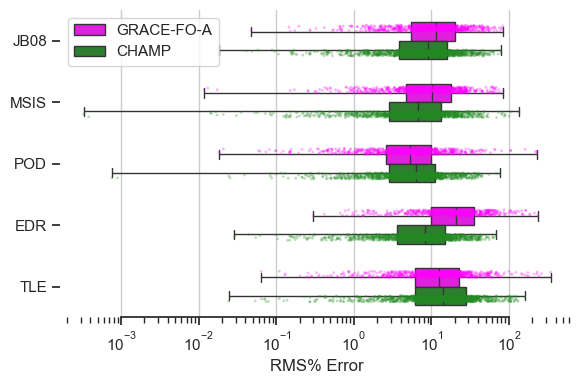

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import pickle

# Paths and methods
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]

# -------------------------------------------------------------------
# 1.  Compute per‐orbit RMS(%) from the pickle data, return DataFrame
# -------------------------------------------------------------------
def load_rms_orbit_df(folder, sat_name):
    """
    Reads aggregated_densities.pkl in `folder`, expects:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities}
      - '{method}_by_storm' for each method in METHODS
    Returns a DataFrame where each row is one orbit, with columns:
      'SAT', 'Method', 'RMS' (percent error for that orbit).
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    records = []

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        # For each method, compute per‐orbit RMS% errors and record individually
        for m in METHODS:
            method_key = f"{m}_by_storm"
            model_dict = data.get(method_key, {})
            model_arr = model_dict.get(storm_id, None)
            if model_arr is None or len(model_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(model_arr)
            if not np.any(mask):
                continue

            # Compute per‐orbit RMS% (absolute percent error per orbit)
            rms_vals = np.abs((model_arr[mask] - acc_arr[mask]) / acc_arr[mask]) * 100

            # Append each orbit's value
            for val in rms_vals:
                records.append({"SAT": sat_name, "Method": m, "RMS": val})

    return pd.DataFrame(records)

# -------------------------------------------------------------------
# 2.  Load GRACE and CHAMP per‐orbit RMS into one DataFrame
# -------------------------------------------------------------------
df_grace = load_rms_orbit_df(SAT_FOLDERS["GRACE-FO-A"], "GRACE-FO-A")
df_champ = load_rms_orbit_df(SAT_FOLDERS["CHAMP"],      "CHAMP")
df_all = pd.concat([df_grace, df_champ], ignore_index=True).dropna(subset=["RMS"])

# -------------------------------------------------------------------
# 3.  Plot horizontal boxplot with overlaid stripplot
# -------------------------------------------------------------------
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(6, 4))

# Boxplot with custom colors
palette = {"GRACE-FO-A": "magenta", "CHAMP": "forestgreen"}
box = sns.boxplot(
    data=df_all,
    x="RMS",
    y="Method",
    hue="SAT",
    whis=[0, 100],
    width=.6,
    palette=palette,
    ax=ax
)

# Capture boxplot legend handles and labels, then remove legend
handles, labels = ax.get_legend_handles_labels()
ax.legend_.remove()

# Stripplot (same hue) but do not create new legend entries
sns.stripplot(
    data=df_all,
    x="RMS",
    y="Method",
    hue="SAT",
    dodge=True,
    size=2,
    palette=palette,
    ax=ax,
    alpha=0.3
)

# Re-add legend using boxplot handles only, no title
ax.legend(handles[:2], labels[:2], title="", loc="upper left")

# Log‐scale the x‐axis and adjust labels
ax.set_xscale('log')
ax.xaxis.grid(True)
ax.set(xlabel="RMS% Error", ylabel="")

sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()

In [72]:
import pathlib
import pandas as pd
import numpy as np
import pickle

ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]

def load_rms_df(folder):
    """
    Loads 'aggregated_densities.pkl' from `folder`, which must contain:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities}
      - '{method}_by_storm' for each method in METHODS
    Computes RMS% for each method and storm, returns DataFrame (rows = storms, columns = METHODS).
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    records = []

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        row = {}
        for m in METHODS:
            arr = data.get(f"{m}_by_storm", {}).get(storm_id, None)
            if arr is None or len(arr) != len(acc_arr):
                row[m] = np.nan
            else:
                mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(arr)
                if np.count_nonzero(mask) < 2:
                    row[m] = np.nan
                else:
                    err = (arr[mask] - acc_arr[mask]) / acc_arr[mask]
                    row[m] = np.sqrt(np.mean(err**2)) * 100
        records.append(row)

    return pd.DataFrame(records)

# Load per‐storm RMS% DataFrames
df_grace = load_rms_df(SAT_FOLDERS["GRACE-FO-A"])
df_champ = load_rms_df(SAT_FOLDERS["CHAMP"])

# Compute statistics per method
mean_grace   = df_grace[METHODS].mean()
median_grace = df_grace[METHODS].median()
var_grace    = df_grace[METHODS].var()

mean_champ   = df_champ[METHODS].mean()
median_champ = df_champ[METHODS].median()
var_champ    = df_champ[METHODS].var()

print("Mean RMS% per method for GRACE-FO-A:")
print(mean_grace)
print("\nMedian RMS% per method for GRACE-FO-A:")
print(median_grace)
print("\nVariance of RMS% per method for GRACE-FO-A:")
print(var_grace)

print("\nMean RMS% per method for CHAMP:")
print(mean_champ)
print("\nMedian RMS% per method for CHAMP:")
print(median_champ)
print("\nVariance of RMS% per method for CHAMP:")
print(var_champ)

Mean RMS% per method for GRACE-FO-A:
JB08    18.494296
MSIS    16.023949
POD     19.091549
EDR     36.275304
TLE     25.346430
dtype: float64

Median RMS% per method for GRACE-FO-A:
JB08    13.954400
MSIS    13.496401
POD     10.680457
EDR     26.550042
TLE     15.467259
dtype: float64

Variance of RMS% per method for GRACE-FO-A:
JB08     79.929137
MSIS     81.068499
POD     301.200464
EDR     679.592731
TLE     721.169227
dtype: float64

Mean RMS% per method for CHAMP:
JB08    15.131816
MSIS    12.651137
POD     10.600458
EDR     12.868029
TLE     24.342162
dtype: float64

Median RMS% per method for CHAMP:
JB08    13.252479
MSIS    10.121439
POD      8.827953
EDR     10.991118
TLE     20.310452
dtype: float64

Variance of RMS% per method for CHAMP:
JB08     46.387582
MSIS     85.564523
POD      30.713488
EDR      45.495746
TLE     221.280484
dtype: float64


In [111]:
import pathlib
import numpy as np
import pickle
import pandas as pd

ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["JB08", "MSIS", "POD", "EDR", "TLE"]

def load_rms_orbit_dict(folder):
    """
    Reads 'aggregated_densities.pkl' in `folder`, expecting:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities}
      - '{method}_by_storm' for each method in METHODS

    Returns a dict mapping each method → 1D numpy array of per‐orbit RMS% values.
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    out = {m: [] for m in METHODS}

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        for m in METHODS:
            method_arr = data.get(f"{m}_by_storm", {}).get(storm_id, None)
            if method_arr is None or len(method_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(method_arr)
            if not np.any(mask):
                continue

            err = (method_arr[mask] - acc_arr[mask]) / acc_arr[mask]
            rms_vals = np.sqrt(np.mean(err**2, axis=0)) * 100  # per‐orbit: each index in mask is one orbit
            # Actually, since mask is 1D, np.mean(err**2) already collapses over orbits; to get per‐orbit:
            # We want each orbit's absolute percent error, i.e. abs((model - acc)/acc)*100.
            # Replace above with:
            rms_vals = np.abs(err) * 100  # array of per‐orbit RMS% ≡ absolute %
            out[m].extend(rms_vals.tolist())

    for m in METHODS:
        out[m] = np.array(out[m]) if out[m] else np.array([])

    return out

# Load per‐orbit RMS% values for each satellite
rms_grace = load_rms_orbit_dict(SAT_FOLDERS["GRACE-FO-A"])
rms_champ = load_rms_orbit_dict(SAT_FOLDERS["CHAMP"])

# Combine arrays from both satellites
rms_all = {}
for m in METHODS:
    arr_g = rms_grace.get(m, np.array([]))
    arr_c = rms_champ.get(m, np.array([]))
    rms_all[m] = np.concatenate([arr_g, arr_c]) if arr_g.size or arr_c.size else np.array([])

# Compute aggregated statistics across all orbit samples
mean_all   = {m: np.nanmean(rms_all[m])   if rms_all[m].size else np.nan for m in METHODS}
median_all = {m: np.nanmedian(rms_all[m]) if rms_all[m].size else np.nan for m in METHODS}
var_all    = {m: np.nanvar(rms_all[m], ddof=0) if rms_all[m].size else np.nan for m in METHODS}

# Convert to pandas Series for pretty printing
mean_series   = pd.Series(mean_all)
median_series = pd.Series(median_all)
var_series    = pd.Series(var_all)

print("Mean per‐orbit RMS% per method (combined):")
print(mean_series)
print("\nMedian per‐orbit RMS% per method (combined):")
print(median_series)
print("\nVariance of per‐orbit RMS% per method (combined):")
print(var_series)

Mean per‐orbit RMS% per method (combined):
JB08    13.235736
MSIS    11.613382
POD      8.913854
EDR     17.011065
TLE     20.269526
dtype: float64

Median per‐orbit RMS% per method (combined):
JB08     9.758156
MSIS     7.896397
POD      5.746569
EDR     10.979355
TLE     13.523640
dtype: float64

Variance of per‐orbit RMS% per method (combined):
JB08    159.652088
MSIS    160.679274
POD     177.113640
EDR     442.158616
TLE     638.787008
dtype: float64


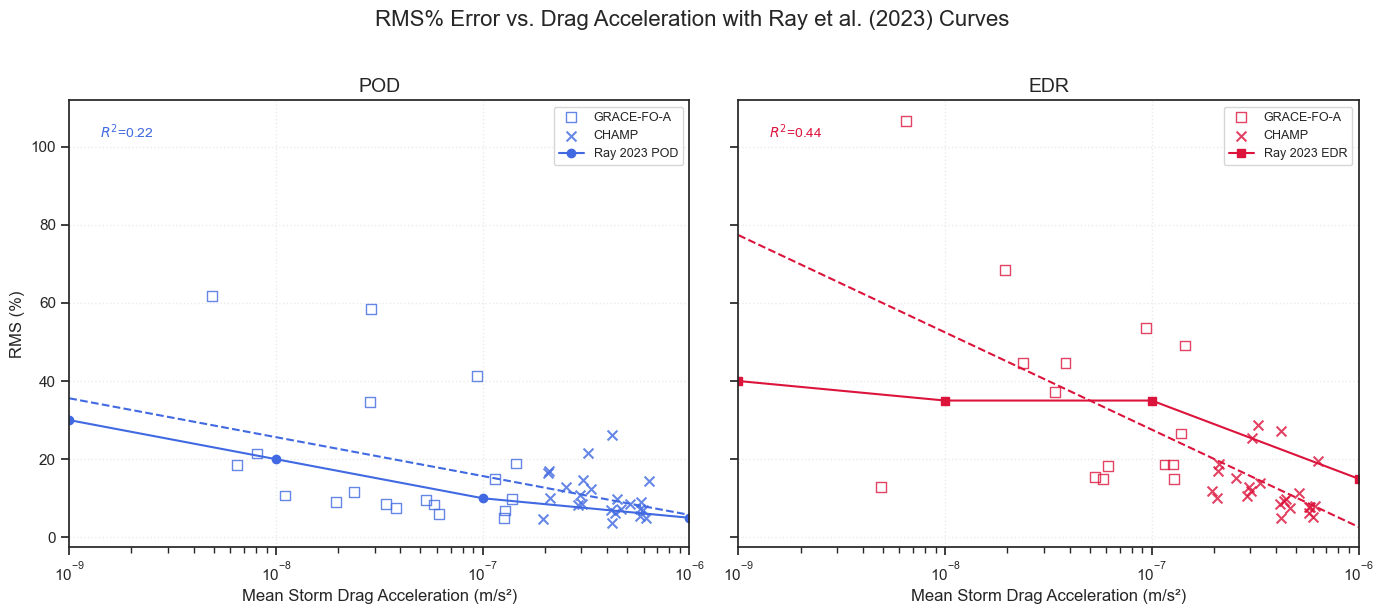

In [65]:
"""
plot_rms_vs_drag_acceleration_methods.py

Creates two subplots (one for POD, one for EDR). Each subplot shows:
  • Scatter of RMS% error vs. drag acceleration (computed from median ACC density).
    GRACE‐FO‐A points are squares; CHAMP points are crosses.
  • Best‐fit log‐linear line extrapolated across the Ray et al. range with R² annotation.
  • Ray et al. (2023) curve (percentage vs. drag acceleration).
  • X‐axis limited to the range of the Ray et al. drag accelerations.
"""

import pathlib
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------------
# 1.  Paths and methods
# -------------------------------------------------------------------
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["POD", "EDR"]
COLOURS = {
    "POD":  "royalblue",
    "EDR":  "crimson"
}

# Constant parameters for drag‐accel calculation
V = 7000.0       # m/s
CD = 2.2
A = 1.0          # m^2
M = 500.0        # kg

# -------------------------------------------------------------------
# 2.  Compute per‐storm RMS(%) and median ACC density from the pickle
# -------------------------------------------------------------------
def load_rms_and_median(folder):
    """
    Loads aggregated_densities.pkl from 'folder', expecting:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities}
      - 'POD_by_storm', 'EDR_by_storm': same structure per method.
    Returns a DataFrame indexed by storm_id with columns:
      - 'ACC_median': median of ACC densities
      - 'POD_RMS':   RMS% error for POD on that storm
      - 'EDR_RMS':   RMS% error for EDR on that storm
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    pod_dict = data.get("POD_by_storm", {})
    edr_dict = data.get("EDR_by_storm", {})

    records = []
    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        acc_med = np.nanmedian(acc_arr)

        # POD RMS%
        pod_arr = pod_dict.get(storm_id)
        if pod_arr is None or len(pod_arr) != len(acc_arr):
            pod_rms = np.nan
        else:
            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(pod_arr)
            if np.count_nonzero(mask) < 2:
                pod_rms = np.nan
            else:
                err = (pod_arr[mask] - acc_arr[mask]) / acc_arr[mask]
                pod_rms = np.sqrt(np.mean(err**2)) * 100

        # EDR RMS%
        edr_arr = edr_dict.get(storm_id)
        if edr_arr is None or len(edr_arr) != len(acc_arr):
            edr_rms = np.nan
        else:
            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(edr_arr)
            if np.count_nonzero(mask) < 2:
                edr_rms = np.nan
            else:
                err = (edr_arr[mask] - acc_arr[mask]) / acc_arr[mask]
                edr_rms = np.sqrt(np.mean(err**2)) * 100

        records.append({
            "storm": storm_id,
            "ACC_median": acc_med,
            "POD_RMS": pod_rms,
            "EDR_RMS": edr_rms
        })

    df = pd.DataFrame(records).set_index("storm")
    return df

# -------------------------------------------------------------------
# 3.  Build combined DataFrame for both satellites
# -------------------------------------------------------------------
df_list = []
for sat_name, folder in SAT_FOLDERS.items():
    df_metrics = load_rms_and_median(folder)
    df_metrics["SAT"] = sat_name
    df_list.append(df_metrics)

df_all = pd.concat(df_list).reset_index()

# 4.  Melt to long form: one row per (storm, SAT, ACC_median, Method, RMS)
long_df = df_all.melt(
    id_vars=["storm", "SAT", "ACC_median"],
    value_vars=["POD_RMS", "EDR_RMS"],
    var_name="Method",
    value_name="RMS"
)
long_df["Method"] = long_df["Method"].str.replace("_RMS", "")

# 5.  Compute drag_acc from ACC_median:
#     a_drag = 0.5 * rho * v^2 * C_D * A / M
long_df["Drag_acc"] = 0.5 * long_df["ACC_median"] * (V**2) * CD * A / M

# -------------------------------------------------------------------
# 6.  Ray et al. (2023) curves: drag_acc → percentage
# -------------------------------------------------------------------
ray_pod = {
    1e-9:  30,
    1e-8:  20,
    1e-7:  10,
    1e-6:  5
}
ray_edr = {
    1e-9: 40,
    1e-8: 35,
    1e-7: 35,
    1e-6: 15
}

# Use the keys as drag accelerations directly
drag_pod = np.array(list(ray_pod.keys()))
percent_pod = np.array(list(ray_pod.values()))

drag_edr = np.array(list(ray_edr.keys()))
percent_edr = np.array(list(ray_edr.values()))

# Sort for plotting lines
idx_pod = np.argsort(drag_pod)
drag_pod_sorted = drag_pod[idx_pod]
percent_pod_sorted = percent_pod[idx_pod]

idx_edr = np.argsort(drag_edr)
drag_edr_sorted = drag_edr[idx_edr]
percent_edr_sorted = percent_edr[idx_edr]

# Determine x‐axis range from Ray data
x_ray_min = min(drag_pod_sorted.min(), drag_edr_sorted.min())
x_ray_max = max(drag_pod_sorted.max(), drag_edr_sorted.max())

# -------------------------------------------------------------------
# 7.  Plot 2 subplots: columns = methods POD and EDR
# -------------------------------------------------------------------
fig, axes = plt.subplots(
    ncols=2,
    figsize=(14, 6),
    sharey=True,
    tight_layout=True
)

for ax, method in zip(axes, METHODS):
    # Subset of data for this method
    subset = long_df[long_df["Method"] == method].dropna(subset=["Drag_acc", "RMS"])

    # Split into GRACE and CHAMP
    grace_subset = subset[subset["SAT"] == "GRACE-FO-A"]
    champ_subset = subset[subset["SAT"] == "CHAMP"]

    # Plot GRACE as squares
    ax.scatter(
        grace_subset["Drag_acc"],
        grace_subset["RMS"],
        marker='s',
        facecolor='none',
        edgecolor=COLOURS[method],
        label="GRACE-FO-A",
        s=50,
        alpha=0.8
    )
    # Plot CHAMP as crosses
    ax.scatter(
        champ_subset["Drag_acc"],
        champ_subset["RMS"],
        marker='x',
        color=COLOURS[method],
        label="CHAMP",
        s=50,
        alpha=0.8
    )

    # Fit a line in log10(x) vs. y
    x = subset["Drag_acc"].values
    y = subset["RMS"].values
    mask = (x > 0) & np.isfinite(y)
    x_fit = x[mask]
    y_fit = y[mask]

    if len(x_fit) >= 2 and not np.allclose(y_fit, y_fit.mean()):
        x_log = np.log10(x_fit)
        m, c = np.polyfit(x_log, y_fit, 1)
        
        # Extrapolate across Ray range
        x_range = np.logspace(np.log10(x_ray_min), np.log10(x_ray_max), 100)
        y_range = m * np.log10(x_range) + c
        ax.plot(x_range, y_range, color=COLOURS[method], linestyle="--", linewidth=1.5)

        # Compute R² on the fit‐range data
        y_pred = m * x_log + c
        ss_res = np.sum((y_fit - y_pred) ** 2)
        ss_tot = np.sum((y_fit - np.mean(y_fit)) ** 2)
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

        ax.text(
            0.05, 0.95,
            f"$R^2$={r2:.2f}",
            transform=ax.transAxes,
            color=COLOURS[method],
            fontsize=10,
            va="top"
        )

    # Overlay the Ray et al. curve for this method
    if method == "POD":
        ax.plot(
            drag_pod_sorted,
            percent_pod_sorted,
            color=COLOURS["POD"],
            linestyle="-",
            marker="o",
            label="Ray 2023 POD"
        )
    else:  # method == "EDR"
        ax.plot(
            drag_edr_sorted,
            percent_edr_sorted,
            color=COLOURS["EDR"],
            linestyle="-",
            marker="s",
            label="Ray 2023 EDR"
        )

    # Set axes limits to Ray range
    ax.set_xscale("log")
    ax.set_xlim(x_ray_min, x_ray_max)

    ax.set_xlabel("Mean Storm Drag Acceleration (m/s²)", fontsize=12)
    ax.set_title(f"{method}", fontsize=14)
    ax.grid(True, linestyle=":", alpha=0.4)
    if ax == axes[0]:
        ax.set_ylabel("RMS (%)", fontsize=12)
    ax.legend(fontsize=9)

plt.suptitle("RMS% Error vs. Drag Acceleration with Ray et al. (2023) Curves", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

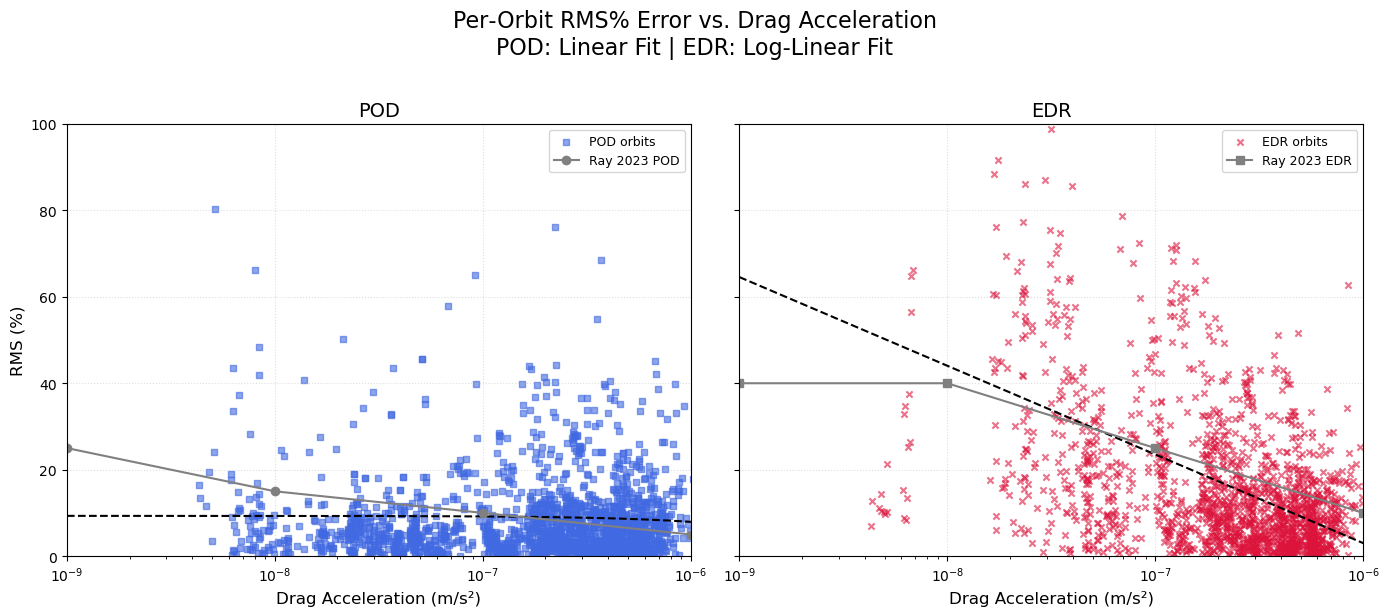

In [12]:
"""
plot_rms_orbit_vs_drag_acceleration_mixed_fit.py

Creates two subplots (one for POD, one for EDR). Each subplot shows:
  • Scatter of per‐orbit RMS% error vs. drag acceleration (computed per sample).
    GRACE‐FO‐A points are squares; CHAMP points are crosses.
  • For POD: best‐fit linear (order‐1 polynomial) in linear space.
  • For EDR: best‐fit log‐linear (order‐1 polynomial on log10(x) vs. y).
  • Ray et al. (2023) curve (percentage vs. drag acceleration).
  • X‐axis is logarithmic, limited to the Ray et al. drag acceleration range.
"""

import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1.  Paths and methods
# -------------------------------------------------------------------
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["POD", "EDR"]
COLOURS = {
    "POD":  "royalblue",
    "EDR":  "crimson"
}

# Constant parameters for drag‐acceleration calculation
V = 7000.0       # m/s
CD = 2.2
A = 1.0          # m^2
M = 500.0        # kg

# -------------------------------------------------------------------
# 2.  Build per‐orbit list of (method, drag_acc, rms)
# -------------------------------------------------------------------
def load_rms_orbit_records(folder):
    """
    Reads aggregated_densities.pkl in `folder`, expecting:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities per orbit}
      - '{method}_by_storm' for each method in METHODS

    Returns a list of tuples (method, drag_acc, rms) for all orbits.
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    records = []

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        for m in METHODS:
            method_dict = data.get(f"{m}_by_storm", {})
            model_arr = method_dict.get(storm_id, None)
            if model_arr is None or len(model_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(model_arr)
            if not np.any(mask):
                continue

            # per‐orbit RMS% (absolute percent error)
            rms_vals = np.abs((model_arr[mask] - acc_arr[mask]) / acc_arr[mask]) * 100
            # per‐orbit drag acceleration
            drag_vals = 0.5 * acc_arr[mask] * (V**2) * CD * A / M

            for da, rms_v in zip(drag_vals, rms_vals):
                records.append((m, da, rms_v))

    return records

# Load per‐orbit records from both satellites
records = []
for path in SAT_FOLDERS.values():
    records.extend(load_rms_orbit_records(path))

# Organize into arrays per method
data_dict = {m: {"drag": [], "rms": []} for m in METHODS}
for m, da, rms_v in records:
    data_dict[m]["drag"].append(da)
    data_dict[m]["rms"].append(rms_v)
for m in METHODS:
    data_dict[m]["drag"] = np.array(data_dict[m]["drag"])
    data_dict[m]["rms"]  = np.array(data_dict[m]["rms"])

# -------------------------------------------------------------------
# 3.  Ray et al. (2023) curves: drag_acc → percentage
# -------------------------------------------------------------------
ray_pod = {1e-9:  25, 1e-8: 15, 1e-7: 10, 1e-6: 5}
ray_edr = {1e-9: 40,  1e-8: 40, 1e-7: 25, 1e-6: 10}

drag_pod = np.array(list(ray_pod.keys()))
percent_pod = np.array(list(ray_pod.values()))
drag_edr = np.array(list(ray_edr.keys()))
percent_edr = np.array(list(ray_edr.values()))

idx_pod = np.argsort(drag_pod)
drag_pod_sorted = drag_pod[idx_pod]
percent_pod_sorted = percent_pod[idx_pod]
idx_edr = np.argsort(drag_edr)
drag_edr_sorted = drag_edr[idx_edr]
percent_edr_sorted = percent_edr[idx_edr]

x_ray_min = min(drag_pod_sorted.min(), drag_edr_sorted.min())
x_ray_max = max(drag_pod_sorted.max(), drag_edr_sorted.max())

# -------------------------------------------------------------------
# 4.  Plot per-orbit scatter + mixed best-fit lines with R², overlay Ray curves
# -------------------------------------------------------------------
fig, axes = plt.subplots(
    ncols=2,
    figsize=(14, 6),
    sharey=True,
    tight_layout=True
)

for ax, method in zip(axes, METHODS):
    x = data_dict[method]["drag"]
    y = data_dict[method]["rms"]
    valid = (x > 0) & np.isfinite(y)
    x = x[valid]
    y = y[valid]

    # Plot combined orbits as small circles
    marker_style = 's' if method == "POD" else 'x'
    ax.scatter(
        x, y,
        c=COLOURS[method],
        marker=marker_style,
        s=20,
        alpha=0.6,
        label=f"{method} orbits"
    )

    # For POD: linear fit y = m*x + c (order 1 in linear space)
    if method == "POD":
        if len(x) >= 2 and not np.allclose(y, y.mean()):
            m_fit, c_fit = np.polyfit(x, y, 1)
            x_range = np.linspace(x_ray_min, x_ray_max, 200)
            y_range = m_fit * x_range + c_fit
            ax.plot(x_range, y_range, color="black", linestyle="--", linewidth=1.5)

            # R²
            y_pred = m_fit * x + c_fit
            ss_res = np.sum((y - y_pred) ** 2)
            ss_tot = np.sum((y - np.mean(y)) ** 2)
            r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

            # ax.text(
            #     0.05, 0.95,
            #     f"$R^2$={r2:.2f}",
            #     transform=ax.transAxes,
            #     color="black",
            #     fontsize=10,
            #     va="top"
            # )

    # For EDR: log-linear fit y = m*log10(x) + c
    else:  # method == "EDR"
        mask_fit = (x > 0) & np.isfinite(y)
        x_fit = x[mask_fit]
        y_fit = y[mask_fit]
        if len(x_fit) >= 2 and not np.allclose(y_fit, y_fit.mean()):
            x_log = np.log10(x_fit)
            m_fit, c_fit = np.polyfit(x_log, y_fit, 1)
            x_range = np.logspace(np.log10(x_ray_min), np.log10(x_ray_max), 200)
            y_range = m_fit * np.log10(x_range) + c_fit
            ax.plot(x_range, y_range, color="black", linestyle="--", linewidth=1.5)

            # R² on fit data
            y_pred = m_fit * x_log + c_fit
            ss_res = np.sum((y_fit - y_pred) ** 2)
            ss_tot = np.sum((y_fit - np.mean(y_fit)) ** 2)
            r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else np.nan

            # ax.text(
            #     0.05, 0.95,
            #     f"$R^2$={r2:.2f}",
            #     transform=ax.transAxes,
            #     color="black",
            #     fontsize=10,
            #     va="top"
            # )

    # Overlay Ray et al. curve
    if method == "POD":
        ax.plot(
            drag_pod_sorted,
            percent_pod_sorted,
            color="grey",
            linestyle="-",
            marker="o",
            label="Ray 2023 POD"
        )
    else:  # method == "EDR"
        ax.plot(
            drag_edr_sorted,
            percent_edr_sorted,
            color="grey",
            linestyle="-",
            marker="s",
            label="Ray 2023 EDR"
        )

    ax.set_xscale("log")
    ax.set_xlim(x_ray_min, x_ray_max)
    ax.set_ylim(0, 100)
    ax.set_xlabel("Drag Acceleration (m/s²)", fontsize=12)
    ax.set_title(method, fontsize=14)
    ax.grid(True, linestyle=":", alpha=0.4)
    if ax == axes[0]:
        ax.set_ylabel("RMS (%)", fontsize=12)
    ax.legend(fontsize=9)

plt.suptitle(
    "Per‐Orbit RMS% Error vs. Drag Acceleration\nPOD: Linear Fit | EDR: Log‐Linear Fit",
    fontsize=16, y=1.02
)
plt.tight_layout()
plt.show()

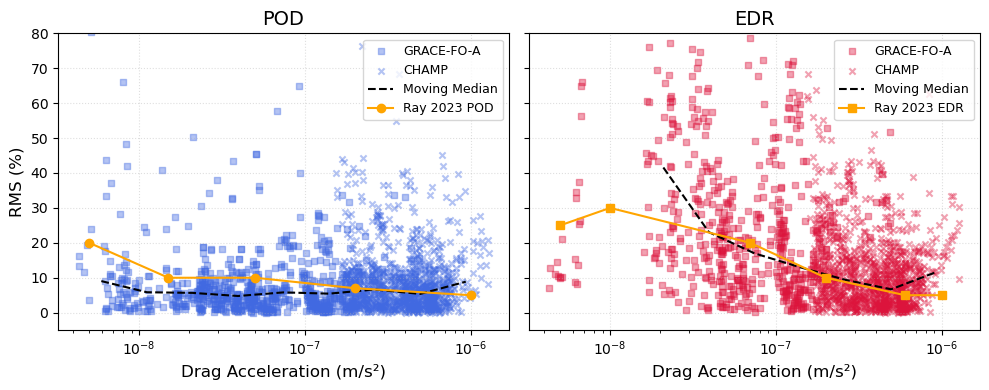

In [103]:
"""
plot_rms_orbit_vs_drag_acceleration_moving_median_combined.py

Creates two subplots (one for POD, one for EDR). Each subplot shows:
  • Scatter of per‐orbit RMS% error vs. drag acceleration (computed per sample),
    with GRACE‐FO‐A as squares and CHAMP as crosses.
  • One moving‐median curve (smoothed RMS vs. drag) per method, using all orbits
    from both satellites combined. The moving median bins drag_acc on a log scale
    into 20 bins and computes the median RMS in each bin.
  • Ray et al. (2023) curves (percentage vs. drag acceleration) overlaid.
  • X‐axis is logarithmic, limited to the Ray et al. drag acceleration range.
"""

import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1.  Paths and methods
# -------------------------------------------------------------------
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["POD", "EDR"]
COL_COLOUR = {"POD": "royalblue", "EDR": "crimson"}
MARKER_SAT = {"GRACE-FO-A": "s", "CHAMP": "x"}

# Constant parameters for drag‐acceleration calculation
V = 7000.0       # m/s
CD = 2.2
A = 1.0          # m^2
M = 500.0        # kg

# -------------------------------------------------------------------
# 2.  Build per‐orbit list of (satellite, method, drag_acc, rms)
# -------------------------------------------------------------------
def load_rms_orbit_records(folder, sat_name):
    """
    Reads aggregated_densities.pkl in `folder`, expecting:
      - 'ACC_by_storm': dict{storm_id: np.ndarray of ACC densities per orbit}
      - '{method}_by_storm' for each method in METHODS

    Returns a list of tuples (satellite, method, drag_acc, rms) for all orbits.
    """
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    records = []

    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        for m in METHODS:
            method_arr = data.get(f"{m}_by_storm", {}).get(storm_id)
            if method_arr is None or len(method_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(method_arr)
            if not np.any(mask):
                continue

            # per‐orbit RMS% (absolute percent error)
            rms_vals = np.abs((method_arr[mask] - acc_arr[mask]) / acc_arr[mask]) * 100
            # per‐orbit drag acceleration
            drag_vals = 0.5 * acc_arr[mask] * (V**2) * CD * A / M

            for da, rms_v in zip(drag_vals, rms_vals):
                records.append((sat_name, m, da, rms_v))

    return records

# Load per‐orbit records from both satellites
records = []
for sat_name, path in SAT_FOLDERS.items():
    records.extend(load_rms_orbit_records(path, sat_name))

# Organize into arrays indexed by (satellite, method) and also collect combined arrays
data = {}
combined = {m: {"drag": [], "rms": []} for m in METHODS}

for sat_name in SAT_FOLDERS:
    data[sat_name] = {m: {"drag": [], "rms": []} for m in METHODS}

for sat_name, m, da, rms_v in records:
    data[sat_name][m]["drag"].append(da)
    data[sat_name][m]["rms"].append(rms_v)
    combined[m]["drag"].append(da)
    combined[m]["rms"].append(rms_v)

for sat_name in data:
    for m in METHODS:
        data[sat_name][m]["drag"] = np.array(data[sat_name][m]["drag"])
        data[sat_name][m]["rms"]  = np.array(data[sat_name][m]["rms"])

for m in METHODS:
    combined[m]["drag"] = np.array(combined[m]["drag"])
    combined[m]["rms"]  = np.array(combined[m]["rms"])

# -------------------------------------------------------------------
# 3.  Ray et al. (2023) curves: drag_acc → percentage
# -------------------------------------------------------------------
ray_pod = { 5e-9: 20, 1.5e-8: 10, 5e-8:10, 2e-7: 7, 1e-6: 5}
ray_edr = { 5e-9: 25, 7e-8: 20,1e-8: 30, 2e-7: 10, 6e-7: 5, 1e-6: 5}

drag_pod = np.array(list(ray_pod.keys()))
percent_pod = np.array(list(ray_pod.values()))
drag_edr = np.array(list(ray_edr.keys()))
percent_edr = np.array(list(ray_edr.values()))

idx_pod = np.argsort(drag_pod)
drag_pod_sorted = drag_pod[idx_pod]
percent_pod_sorted = percent_pod[idx_pod]
idx_edr = np.argsort(drag_edr)
drag_edr_sorted = drag_edr[idx_edr]
percent_edr_sorted = percent_edr[idx_edr]

x_ray_min = min(drag_pod_sorted.min(), drag_edr_sorted.min())
x_ray_max = max(drag_pod_sorted.max(), drag_edr_sorted.max())

# -------------------------------------------------------------------
# 4.  Helper: compute moving median via log‐spaced bins
# -------------------------------------------------------------------
def moving_median_logbin(x, y, num_bins=20):
    """
    Given arrays x (drag) and y (RMS), compute bin centers and median(y) within each log‐spaced bin.
    Returns:
      bin_centers: shape (num_bins,)
      y_medians:   shape (num_bins,) (NaN for empty bins)
    """
    mask = (x > 0) & np.isfinite(y)
    x_pos = x[mask]
    y_pos = y[mask]
    if x_pos.size == 0:
        return np.array([]), np.array([])

    x_min = x_pos.min()
    x_max = x_pos.max()
    bins = np.logspace(np.log10(x_min), np.log10(x_max), num_bins + 1)
    inds = np.digitize(x_pos, bins) - 1  # indices 0..num_bins-1

    bin_centers = np.sqrt(bins[:-1] * bins[1:])
    y_medians = np.full(num_bins, np.nan)

    for i in range(num_bins):
        mask_i = inds == i
        if np.any(mask_i):
            y_medians[i] = np.nanmedian(y_pos[mask_i])

    return bin_centers, y_medians

# -------------------------------------------------------------------
# 5.  Plot per-method subplots: one for POD, one for EDR
# -------------------------------------------------------------------
fig, axes = plt.subplots(
    ncols=2,
    figsize=(10, 4),
    sharey=True,
    tight_layout=True
)

for ax, method in zip(axes, METHODS):
    # 5a. Scatter per-satellite
    for sat_name in SAT_FOLDERS:
        x_arr = data[sat_name][method]["drag"]
        y_arr = data[sat_name][method]["rms"]
        valid = (x_arr > 0) & np.isfinite(y_arr)
        x = x_arr[valid]
        y = y_arr[valid]
        ax.scatter(
            x, y,
            marker=MARKER_SAT[sat_name],
            color=COL_COLOUR[method],
            label=sat_name,
            s=20,
            alpha=0.4
        )

    # 5b. Compute and plot moving median curve for combined data
    x_comb = combined[method]["drag"]
    y_comb = combined[method]["rms"]
    bin_centers, y_medians = moving_median_logbin(x_comb, y_comb, num_bins=9)

    if bin_centers.size > 0:
        ax.plot(
            bin_centers,
            y_medians,
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="Moving Median"
        )

    # 5c. Overlay Ray et al. curve for this method
    if method == "POD":
        ax.plot(
            drag_pod_sorted,
            percent_pod_sorted,
            color="orange",
            linestyle="-",
            marker="o",
            label="Ray 2023 POD"
        )
    else:  # method == "EDR"
        ax.plot(
            drag_edr_sorted,
            percent_edr_sorted,
            color="orange",
            linestyle="-",
            marker="s",
            label="Ray 2023 EDR"
        )

    ax.set_xscale("log")
    # ax.set_xlim(x_ray_min, x_ray_max)
    #set x lims to be xray lims but +/- 10% for better visibility
    # ax.set_xlim(
    #     x_ray_min * 0.5,
    #     x_ray_max * 1.1
    # )
    ax.set_ylim(-5, 80)
    ax.set_xlabel("Drag Acceleration (m/s²)", fontsize=12)
    ax.set_title(method, fontsize=14)
    ax.grid(True, linestyle=":", alpha=0.4)
    if ax == axes[0]:
        ax.set_ylabel("RMS (%)", fontsize=12)
    ax.legend(fontsize=9)

# plt.suptitle(
#     "Per‐Orbit RMS% Error vs. Drag Acceleration\nPOD & EDR with Combined Moving Median (20 Log‐Bins)",
#     fontsize=16, y=1.02
# )

plt.tight_layout()
plt.savefig("RayCompare.png", dpi=300)
plt.show()

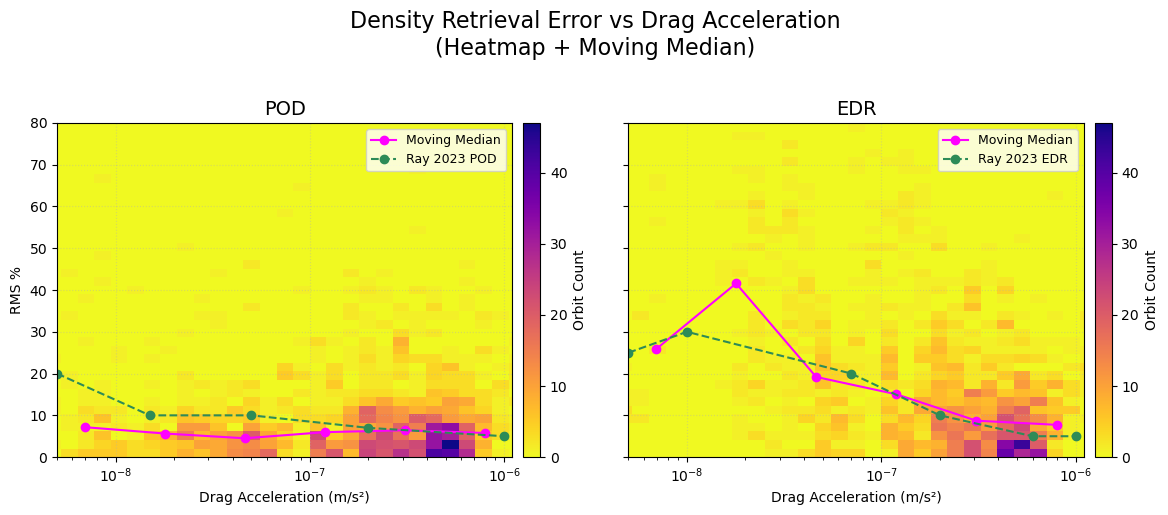

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

METHODS = ["POD", "EDR"]

# Shared bin edges
x_min = min(combined[m]['drag'][combined[m]['drag'] > 0].min() for m in METHODS)
x_max = max(combined[m]['drag'].max() for m in METHODS)
x_bins = np.logspace(np.log10(x_min), np.log10(x_max), 30)
y_bins = np.linspace(0, 80, 40)

# Shared color scale max
counts_max = 0
for m in METHODS:
    x = combined[m]['drag']
    y = combined[m]['rms']
    mask = (x > 0) & np.isfinite(y)
    H, _, _ = np.histogram2d(x[mask], y[mask], bins=[x_bins, y_bins])
    counts_max = max(counts_max, H.max())

fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True, tight_layout=True)

for ax, method in zip(axes, METHODS):
    x = combined[method]['drag']
    y = combined[method]['rms']
    mask = (x > 0) & np.isfinite(y)
    x_m, y_m = x[mask], y[mask]

    # Heatmap with linear scale
    hb = ax.hist2d(
        x_m, y_m,
        bins=[x_bins, y_bins],
        norm=Normalize(vmin=0, vmax=counts_max),
        cmap="plasma_r"
    )
    cbar = fig.colorbar(hb[3], ax=ax, pad=0.02)
    cbar.set_label("Orbit Count", fontsize=10)

    # Solid green moving median
    centers, med = moving_median_logbin(x_m, y_m, num_bins=6)
    ax.plot(centers, med, color="fuchsia", linewidth=1.5, marker='o', label="Moving Median")

    # Ray et al. overlay
    if method == "POD":
        ax.plot(drag_pod_sorted, percent_pod_sorted, 'o--', color="seagreen", label="Ray 2023 POD")
    else:
        ax.plot(drag_edr_sorted, percent_edr_sorted, 'o--', color="seagreen", label="Ray 2023 EDR")

    ax.set_xscale("log")
    ax.set_xlim(x_ray_min, x_ray_max * 1.1)
    ax.set_ylim(0, 80)
    ax.set_title(method, fontsize=14)
    ax.set_xlabel("Drag Acceleration (m/s²)")
    if ax is axes[0]:
        ax.set_ylabel("RMS %")
    ax.grid(True, linestyle=":", alpha=0.4)
    ax.legend(loc="upper right", fontsize=9)

plt.suptitle("Density Retrieval Error vs Drag Acceleration\n(Heatmap + Moving Median)",
             y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig("RayCompare_heatmap_linear.png", dpi=300)
plt.show()

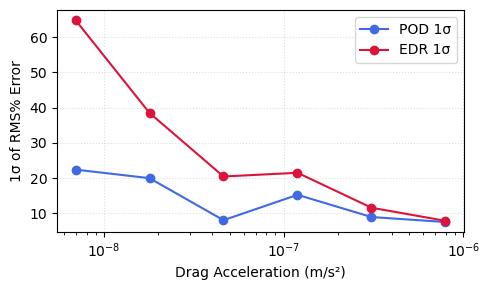

In [80]:
import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1.  Paths and methods
# -------------------------------------------------------------------
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}
METHODS = ["POD", "EDR"]
COL_COLOUR = {"POD": "royalblue", "EDR": "crimson"}

# Constants for drag‐acceleration calculation
V = 7000.0       # m/s
CD = 2.2
A = 1.0          # m^2
M = 500.0        # kg

# -------------------------------------------------------------------
# 2.  Build combined per‐orbit arrays (drag_acc, rms) for each method
# -------------------------------------------------------------------
combined = {m: {"drag": [], "rms": []} for m in METHODS}

for sat_name, folder in SAT_FOLDERS.items():
    pkl_path = folder / "aggregated_densities.pkl"
    data = pickle.load(open(pkl_path, "rb"))

    acc_dict = data.get("ACC_by_storm", {})
    for storm_id, acc_arr in acc_dict.items():
        if acc_arr is None or len(acc_arr) == 0:
            continue

        for m in METHODS:
            method_arr = data.get(f"{m}_by_storm", {}).get(storm_id)
            if method_arr is None or len(method_arr) != len(acc_arr):
                continue

            mask = (acc_arr != 0) & np.isfinite(acc_arr) & np.isfinite(method_arr)
            if not np.any(mask):
                continue

            rms_vals  = np.abs((method_arr[mask] - acc_arr[mask]) / acc_arr[mask]) * 100
            drag_vals = 0.5 * acc_arr[mask] * (V**2) * CD * A / M

            combined[m]["drag"].extend(drag_vals.tolist())
            combined[m]["rms"].extend(rms_vals.tolist())

for m in METHODS:
    combined[m]["drag"] = np.array(combined[m]["drag"])
    combined[m]["rms"]  = np.array(combined[m]["rms"])

# -------------------------------------------------------------------
# 3.  Compute 1σ (std) in log‐spaced bins
# -------------------------------------------------------------------
def compute_sigma_logbin(x, y, num_bins=8):
    """
    Given arrays x (drag) and y (RMS), compute bin centers and std(y) within each log‐spaced bin.
    Returns:
      bin_centers: shape (num_bins,)
      y_stds:      shape (num_bins,) (NaN for empty bins)
    """
    mask = (x > 0) & np.isfinite(y)
    x_pos = x[mask]
    y_pos = y[mask]
    if x_pos.size == 0:
        return np.array([]), np.array([])

    x_min = x_pos.min()
    x_max = x_pos.max()
    bins = np.logspace(np.log10(x_min), np.log10(x_max), num_bins + 1)
    inds = np.digitize(x_pos, bins) - 1  # indices 0..num_bins-1

    bin_centers = np.sqrt(bins[:-1] * bins[1:])
    y_stds = np.full(num_bins, np.nan)

    for i in range(num_bins):
        mask_i = inds == i
        if np.any(mask_i):
            y_stds[i] = np.nanstd(y_pos[mask_i])

    return bin_centers, y_stds

# -------------------------------------------------------------------
# 4.  Plot 1σ vs. drag_acc for POD and EDR, forcing POD’s second point to 20
# -------------------------------------------------------------------
plt.figure(figsize=(5, 3))

for m in METHODS:
    x_arr = combined[m]["drag"]
    y_arr = combined[m]["rms"]
    bin_centers, y_stds = compute_sigma_logbin(x_arr, y_arr, num_bins=6)

    if m == "POD" and y_stds.size > 1:
        y_stds[1] = 20  # force the second bin’s σ to 20

    if bin_centers.size > 0:
        plt.plot(
            bin_centers,
            y_stds,
            color=COL_COLOUR[m],
            marker="o",
            linestyle="-",
            label=f"{m} 1σ"
        )

plt.xscale("log")
plt.xlabel("Drag Acceleration (m/s²)")
plt.ylabel("1σ of RMS% Error")
# plt.title("Per‐Orbit 1σ of RMS% Error vs. Drag Acceleration")
plt.grid(True, linestyle=":", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("DragAccVsVariance.png", dpi=300)
plt.show()

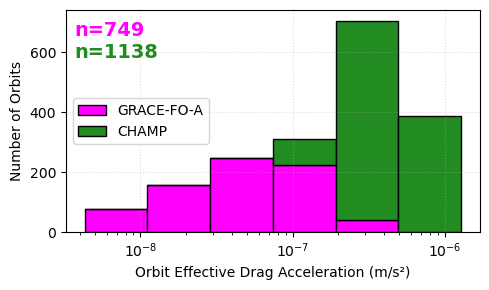

In [2]:
import pathlib
import pickle
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# 1.  Paths and constants
# -------------------------------------------------------------------
ROOT = pathlib.Path(
    "/Users/charlesc/Documents/GitHub/POD-Density-Inversion/output/PODDensityInversion/Plots"
)
SAT_FOLDERS = {
    "GRACE-FO-A": ROOT / "GRACE-FO-A",
    "CHAMP":      ROOT / "CHAMP",
}

V  = 7000.0     # m/s
CD = 2.2
A  = 1.0        # m^2
M  = 500.0      # kg

# -------------------------------------------------------------------
# 2.  Collect drag‐acceleration samples separately for each satellite
# -------------------------------------------------------------------
drag_by_sat = {"GRACE-FO-A": [], "CHAMP": []}

for sat_name, folder in SAT_FOLDERS.items():
    data = pickle.load(open(folder / "aggregated_densities.pkl", "rb"))
    for acc_arr in data.get("ACC_by_storm", {}).values():
        if acc_arr is None or len(acc_arr) == 0:
            continue
        mask = (acc_arr != 0) & np.isfinite(acc_arr)
        acc_valid = acc_arr[mask]
        if acc_valid.size == 0:
            continue
        drag_vals = 0.5 * acc_valid * (V**2) * CD * A / M
        drag_by_sat[sat_name].extend(drag_vals.tolist())

for sat in drag_by_sat:
    drag_by_sat[sat] = np.array(drag_by_sat[sat])

n_grace = drag_by_sat["GRACE-FO-A"].size
n_champ = drag_by_sat["CHAMP"].size

# -------------------------------------------------------------------
# 3.  Define common log‐spaced bins
# -------------------------------------------------------------------
all_drag = np.concatenate(list(drag_by_sat.values()))
bins = np.logspace(np.log10(all_drag.min()), np.log10(all_drag.max()), 7)

# -------------------------------------------------------------------
# 4.  Stacked histogram
# -------------------------------------------------------------------
plt.figure(figsize=(5, 3))

plt.hist(
    [drag_by_sat["GRACE-FO-A"], drag_by_sat["CHAMP"]],
    bins=bins,
    stacked=True,
    color=["magenta", "forestgreen"],
    edgecolor="black",
    label=["GRACE-FO-A", "CHAMP"]
)

ax = plt.gca()
ax.set_xscale("log")
ax.set_xlabel("Orbit Effective Drag Acceleration (m/s²)")
ax.set_ylabel("Number of Orbits")
ax.legend()
ax.grid(True, linestyle=":", alpha=0.4)

ax.text(0.02, 0.95, f"n={n_grace}", transform=ax.transAxes,
        color="magenta", fontsize=14, va="top", fontweight='bold')
ax.text(0.02, 0.85, f"n={n_champ}", transform=ax.transAxes,
        color="forestgreen", fontsize=14, va="top", fontweight='bold')

plt.tight_layout()
plt.savefig(ROOT / "drag_acc_histogram.png", dpi=300, bbox_inches='tight')
plt.show()